### Investigate Correlations Between Different Stocks & ETFs
##### *Author: Lim Chin En*
#####  *Updated on 26th Feb 2022*

Correlation is a satistic that measures the degrees to which two securities move relation to each other. It can be quantified by using correlation coefficient.

The formula is:

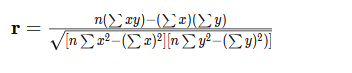

<br>

The correlation coefficient is a number between -1 to 1:
- A correlation coefficient of 0 suggest that there is no linear relationship
- A correlation coefficient of 1 suggest that there is a positive linear relationship
- A correlation coefficient of -1 suggest that there is a negative linear relationship

<br>

The linear correlation coefficient can be helpful in:
- Optimizing the investment portfolio with higher returns and lower volatility. Downside risk can be hedged by adding a negatively correlated asset into the portfolio.
- It can determine how well a muture fund is behaving compared to its benchmark index.

<br>

*Disclaimer: All investment strategies and investments involve risk of loss. Nothing in this project and article constitutes professional and/or financial advice. Past performance are not guarantee of the future results.*

#### Task 1: Correlation between 2 securities.
In this example we would like to check the correlation between 2 securities: 
- The overall stock market, which is tracked by SPDR S&P 500 Trust ETF (NYSEARCA: **SPY**). 
- The financial service sector market, which is tracked by Financial Select Sector SPDR Fund (NYSEARCA: **XLF**)

<br>

First, we get the stock data for SPY. We can automate the data retriving process by using the yfinance library. We will take the stock price from 1st Jan 2020 to 25th Feb 2022, which is the date of this project was done. Some pre-processing of data is required before the correlation matrix is generated.

In [38]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date

interval = '1d'
start_date = '2020-1-1'
end_date = '2022-2-25'

#retrive the stock price history for SPY
tickerSymbol = 'SPY'
tickerData = yf.Ticker(tickerSymbol)
stock_SPY = tickerData.history(period=interval, start=start_date, end=end_date)
stock_SPY.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,310.514823,312.064836,310.146692,311.803253,57077300,0.0,0
2020-01-02,313.430717,314.738541,312.452266,314.719147,59151200,0.0,0
2020-01-03,311.125117,313.527638,311.066994,312.336060,77709700,0.0,0
2020-01-06,310.476019,313.614803,310.350076,313.527618,55653900,0.0,0
2020-01-07,312.926944,313.430715,312.171317,312.646027,40496400,0.0,0


In order to calculate the correlation coefficient, we need to calculate the percentage changes for the stock price movement. A new calculated column has been added to display the daily percentage changes.

In [39]:
new_column_name = '%Change_stock ' + tickerSymbol
stock_SPY[new_column_name]= stock_SPY['Close'].pct_change()
stock_SPY.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,%Change_stock SPY
Date,,,,,,,,
2019-12-31,310.514823,312.064836,310.146692,311.803253,57077300,0.0,0,NaN
2020-01-02,313.430717,314.738541,312.452266,314.719147,59151200,0.0,0,0.009352
2020-01-03,311.125117,313.527638,311.066994,312.336060,77709700,0.0,0,-0.007572
2020-01-06,310.476019,313.614803,310.350076,313.527618,55653900,0.0,0,0.003815
2020-01-07,312.926944,313.430715,312.171317,312.646027,40496400,0.0,0,-0.002812


Next, we create a new dataframe with the %Change_stock column only

In [40]:
stock_SPY_change = stock_SPY[[new_column_name]]
stock_SPY_change.head()

,%Change_stock SPY
Date,
2019-12-31,NaN
2020-01-02,0.009352
2020-01-03,-0.007572
2020-01-06,0.003815
2020-01-07,-0.002812


Repeat the same operation on XLF

In [41]:
# Retrive stock data
tickerSymbol = 'XLF'
tickerData = yf.Ticker(tickerSymbol)
stock_XLF = tickerData.history(period=interval, start=start_date, end=end_date)

#Calculate percentage changes
new_column_name = '%Change_stock ' + tickerSymbol
stock_XLF[new_column_name]= stock_XLF['Close'].pct_change()

#Create a new dataframe with % change only
stock_XLF_change = stock_XLF[[new_column_name]]
stock_XLF_change.head()

,%Change_stock XLF
Date,
2019-12-31,NaN
2020-01-02,0.009746
2020-01-03,-0.010618
2020-01-06,-0.000650
2020-01-07,-0.006508


Let's perform an inner join on between stock_SPY_change and stock_XLF_change on the Date

In [42]:
stock_merged = pd.merge(stock_SPY_change, stock_XLF_change, left_index=True, right_index=True)
stock_merged.head()

,%Change_stock SPY,%Change_stock XLF
Date,,
2019-12-31,NaN,NaN
2020-01-02,0.009352,0.009746
2020-01-03,-0.007572,-0.010618
2020-01-06,0.003815,-0.000650
2020-01-07,-0.002812,-0.006508


,%Change_stock SPY,%Change_stock XLF
%Change_stock SPY,1.000000,0.863873
%Change_stock XLF,0.863873,1.000000


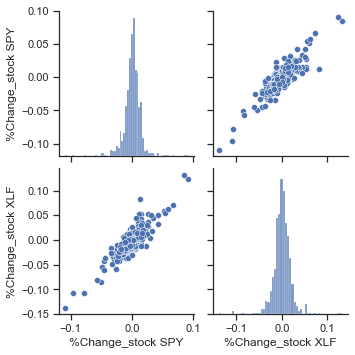

In [43]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(stock_merged)

corrMatrix = stock_merged.corr()
corrMatrix

From the correlation matrix generated, we can see that the performance of the financial sector (XLF) is highly correlated to the overall market (SPY) as the correlation coefficient is very close to 1. We can observed a strong positive relationship between the price movement of SPY and XLF from the pairplot. 

The correlation coefficient at the diagonal is always equal to one as it is comparing against its data. 

#### Task 2: Correlations Between Multiple (more than 2) stocks
This time we we will go further by generating a correlation matrix and pair plots for multiple stocks. Supposedly we have a list of stocks that we would like to investigate:
<br>

    1) S&P 500 (SPY)
    2) Advanced Micro Devices (AMD)
    3) Ark Innovation ETF (ARKK)
    4) Microsoft (MSFT)
    5) Goldman Sachs (GS)
    6) ExxonMobil (XOM)

In [44]:
stock_list = ['SPY', 'AMD', 'ARKK', 'MSFT', 'GS', 'XOM']

The basic algorithm is similar as the codes that we have shoen in Task 1, but now we incorporate the for loop to automate the whole process.

First, we will create a new dataframe (we will name it stock_master) with % change column for the first stock in the list (e.g. SPY). Then, we will use a for loop to append the rest of the stocks.

In [45]:
# Retrive stock data
tickerSymbol = stock_list[0]
tickerData = yf.Ticker(tickerSymbol)
stock = tickerData.history(period=interval, start=start_date, end=end_date)

#Calculate percentage changes
new_column_name = '%Change_stock ' + tickerSymbol
stock[new_column_name]= stock['Close'].pct_change()

#Create a new dataframe with % change only
stock_master = stock[[new_column_name]]

for stock in stock_list[1:]:
    # Retrive stock data
    tickerSymbol = stock
    tickerData = yf.Ticker(tickerSymbol)
    stock = tickerData.history(period=interval, start=start_date, end=end_date)

    #Calculate percentage changes
    new_column_name = '%Change_stock ' + tickerSymbol
    stock[new_column_name]= stock['Close'].pct_change()

    #Create a new dataframe with % change only
    stock_change = stock[[new_column_name]]
    
    #Join the newly generated dataframe to the stock_master 
    stock_merged = pd.merge(stock_master, stock_change, left_index=True, right_index=True)
    stock_master = stock_merged

stock_master.head(5)

,%Change_stock SPY,%Change_stock AMD,%Change_stock ARKK,%Change_stock MSFT,%Change_stock GS,%Change_stock XOM
Date,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.009352,0.070650,0.008991,0.018516,0.019093,0.016051
2020-01-03,-0.007572,-0.010183,-0.007327,-0.012452,-0.011693,-0.008039
2020-01-06,0.003815,-0.004321,0.007780,0.002585,0.010234,0.007678
2020-01-07,-0.002812,-0.002893,0.012272,-0.009118,0.006583,-0.008184


,%Change_stock SPY,%Change_stock AMD,%Change_stock ARKK,%Change_stock MSFT,%Change_stock GS,%Change_stock XOM
%Change_stock SPY,1.000000,0.613043,0.691460,0.844647,0.775713,0.633596
%Change_stock AMD,0.613043,1.000000,0.639171,0.625639,0.370689,0.230068
%Change_stock ARKK,0.691460,0.639171,1.000000,0.665820,0.471515,0.314574
%Change_stock MSFT,0.844647,0.625639,0.665820,1.000000,0.521288,0.344649
%Change_stock GS,0.775713,0.370689,0.471515,0.521288,1.000000,0.668896
%Change_stock XOM,0.633596,0.230068,0.314574,0.344649,0.668896,1.000000


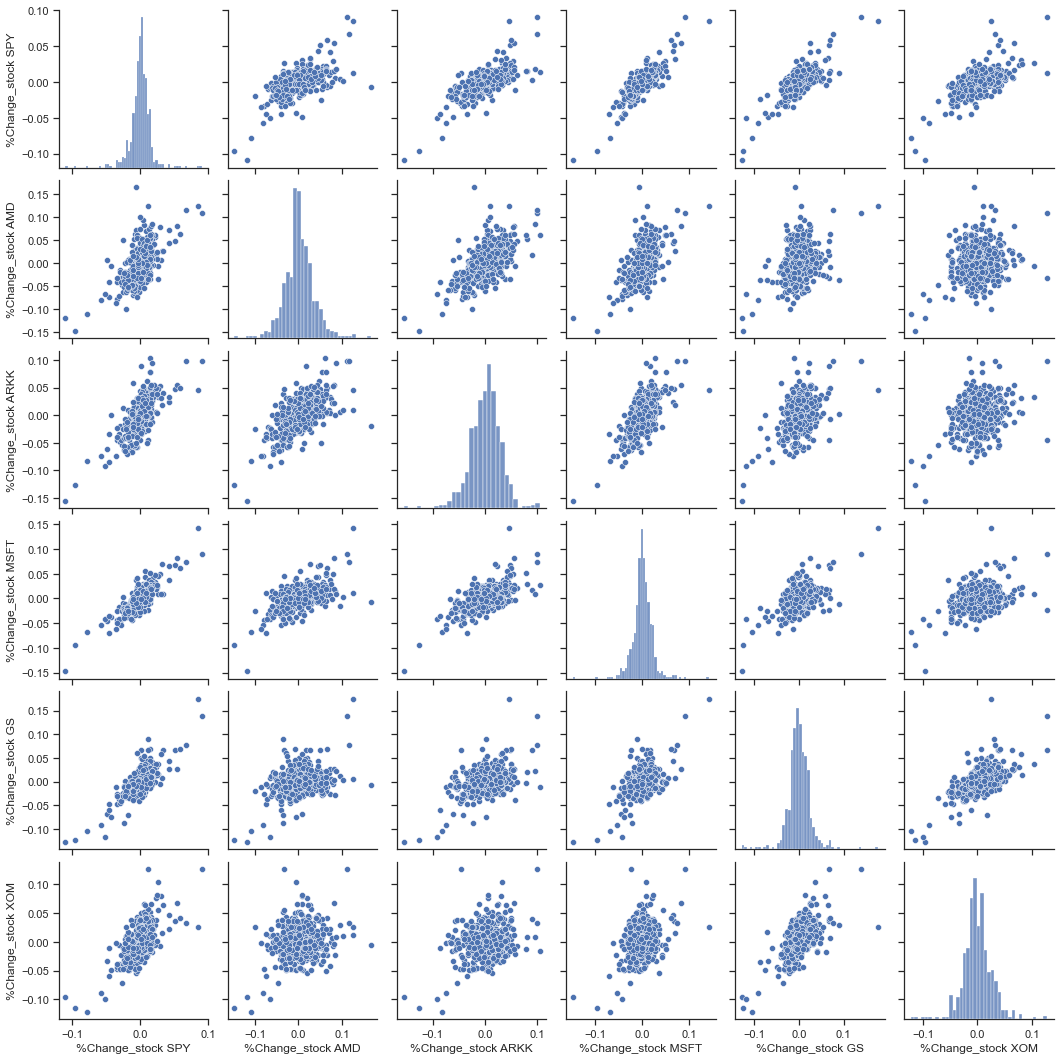

In [46]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(stock_master)

corrMatrix = stock_master.corr(method='pearson')
corrMatrix

Sort the correlation matrix for every stock combination

In [50]:
sorted_mat = corrMatrix.unstack().sort_values()
sorted_mat

%Change_stock XOM   %Change_stock AMD     0.230068
%Change_stock AMD   %Change_stock XOM     0.230068
%Change_stock ARKK  %Change_stock XOM     0.314574
%Change_stock XOM   %Change_stock ARKK    0.314574
%Change_stock MSFT  %Change_stock XOM     0.344649
%Change_stock XOM   %Change_stock MSFT    0.344649
%Change_stock GS    %Change_stock AMD     0.370689
%Change_stock AMD   %Change_stock GS      0.370689
%Change_stock ARKK  %Change_stock GS      0.471515
%Change_stock GS    %Change_stock ARKK    0.471515
                    %Change_stock MSFT    0.521288
%Change_stock MSFT  %Change_stock GS      0.521288
%Change_stock AMD   %Change_stock SPY     0.613043
%Change_stock SPY   %Change_stock AMD     0.613043
%Change_stock MSFT  %Change_stock AMD     0.625639
%Change_stock AMD   %Change_stock MSFT    0.625639
%Change_stock XOM   %Change_stock SPY     0.633596
%Change_stock SPY   %Change_stock XOM     0.633596
%Change_stock AMD   %Change_stock ARKK    0.639171
%Change_stock ARKK  %Change_sto

Sort correlation matrix without repetition.

Credit: https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

In [53]:
def sort_without_rep(correlation_matrix):

    # Retain upper triangular values of correlation matrix and
    # make Lower triangular values Null
    upper_corr_mat = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
  
    # Convert to 1-D series and drop Null values
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
    # Sort correlation pairs
    sorted_mat = unique_corr_pairs.sort_values()
    
    return sorted_mat

In [56]:
sort_without_rep(corrMatrix)

%Change_stock XOM   %Change_stock AMD     0.230068
                    %Change_stock ARKK    0.314574
                    %Change_stock MSFT    0.344649
%Change_stock GS    %Change_stock AMD     0.370689
                    %Change_stock ARKK    0.471515
                    %Change_stock MSFT    0.521288
%Change_stock AMD   %Change_stock SPY     0.613043
%Change_stock MSFT  %Change_stock AMD     0.625639
%Change_stock XOM   %Change_stock SPY     0.633596
%Change_stock ARKK  %Change_stock AMD     0.639171
%Change_stock MSFT  %Change_stock ARKK    0.665820
%Change_stock XOM   %Change_stock GS      0.668896
%Change_stock ARKK  %Change_stock SPY     0.691460
%Change_stock GS    %Change_stock SPY     0.775713
%Change_stock MSFT  %Change_stock SPY     0.844647
dtype: float64

We can see that the correlation between Microsoft and S&P 500 is the strongest. 

<br>

On the other hand, the correlation between ExxonMobil and AMD is the weakest. This make sense as Exxonmobil and AMD are oil and semiconductor industry respectively, which are two totally different industry. 

##### Revision Notes:
- Rev.0: 9th Oct 2021
    - First version.
- Rev.1: 26th Feb 2022
    - Simplify the codes and work process.
    - Add a code to sort the correlation coefficient.